### План выполнения проекта ###

 [Импорт библиотек, подготовка данных](#step1)
 
 [Часть 1. Приоритизация гипотез](#step2)
  
 [Часть 2. Анализ A/B-теста](#step3)

  [Выводы](#step4)




## <a id="step1">Импорт библиотек </a>

In [1]:
# импорт библиотек

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## <a id="step2">Часть 1. Приоритизация гипотез </a>

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

display(hypothesis.head())
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
hypothesis.describe()

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


В данной таблице собраны 9 гипотез и оценены 4 параметра: Reach(обхват), Impact(влияние), Confidence(уверенность в гипотезе), Efforts(стоимость тестирования гипотезы). Оценки были проставлены по 10 балльной шкале.



### Приоритизация гипотез. ICE

Приоритизируем данные гипотезы с помощью фреймворка ICE.


In [4]:
# применим функцию для отображения большего количества символов в строке
pd.options.display.max_colwidth = 100

#применим функцию для отображения чисел в формате float с двумя знаками после запятой
pd.options.display.float_format = '{:,.2f}'.format

hypothesis['ICE'] = hypothesis['Impact'] * \
    hypothesis['Confidence'] / hypothesis['Efforts']

display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Согласна приоритизации методом ICE, наиболее важные гипотезы в порядке убывания их важности: 8, 0 и 7.

Причем можно заметить, что в 8 гипотезе (на 1 месте) "Запустить акцию, дающую скидку на товар в день рождения", влияние на пользователей почти максимальное, а стоимость тестирования - средняя, а уверенность в гипотезе оценена в максимальный балл из всех проставленных баллов.

Гипотеза №0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	" - на втором месте с максимальным баллом по влиянию на пользователя, но с меньшим баллом уверенности в гипотезе и бОльшим баллом оценки затрат на тестирование.

В то время как 7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" имеет меньще влияние, оценку в 8 баллов - уверенность в гипотезе и такую же оценку стоимости тестирования, что и 1ая гипотеза. И данная гипотеза является 3ей по значимости.

Как можно заметить, в данном фреймворке не учитывается обхват пользователей, которых затронет изменение. Используем метод RICE, чтобы учитывать параметр Reach.

### Приоритизация гипотез. RICE

In [5]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * \
    hypothesis['Confidence'] / hypothesis['Efforts']

display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.00


При применении модификации RICE, положение гипотез по степени важности изменились:

7 гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" отныне 1ая по важности - неудивительно, ведь абсолютно все пользователи будут использовать тестируемую функциональность и даже с не самым максимальным влиянием на пользователя(7 из 10) и при должной уверенности в гипотезе 8 (почти самая максимальная), данная функциональность, вероятно, может принести бОльшую полезность компании, ведь стоимость затрат на тестировании не так высока: 5 из 10.

2 гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек" на втором месте, с большим отрывом. Охват пользователей почти максимален, а вот влияние на пользователей тестируемой функциональности невысоко - 3 из 10. Тем не менее, компания вполне уверена в гипотезе, да и стоимость тестирования невысоко - 3 из 10.

На 3ем месте гипотеза о добавлении двух новых канала привлечения трафика охватывает не так много пользователей: если взять за максимальный балл 100% пользователей, то охват этой гипотезы равен 30%, но влияние очень высоко - максимальный балл. Это неувдиивтельно, ведь новые каналы привлечения трафика сулят нам бОльшую прибыль, это важно для собственников бизнеса и для компании в целом. При этом высока уверенность в гипотезе, а стоимость затрат - чуть больше среднего.

### Как изменилась приоритизация гипотез при применении RICE вместо ICE?

In [6]:
print('Наиболее важные гипотезы при применении фреймворка ICE:')
display(hypothesis.sort_values(by='ICE', ascending=False).head(5))
print('Наиболее важные гипотезы при применении фреймворка RICE:')
display(hypothesis.sort_values(by='RICE', ascending=False).head(5))

Наиболее важные гипотезы при применении фреймворка ICE:


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.00


Наиболее важные гипотезы при применении фреймворка RICE:


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.20


При применении RICE вместо ICE, наиболее важная гипотеза №8 "Запустить акцию, дающую скидку на товар в день рождения" опустилась на 5 позицию по приоритету. Дело в том, что данная гипотеза охватывает лишь 10% пользователей и не смотря на высокое влияние и уверенность в гипотезе, среднюю стоимость затрат, она не та гипотеза, на которой нужно сфокусироваться в первую очередь.

Гипотеза № 0 "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" на 2 месте при использовании ICE и на 3 месте - при RICE. Гипотеза важна в любом случае, ведь от привлечения новых пользователей возможно увеличение конверсии и прибыли. И тут влияние новой функциональности максимально, что влияет на высокую позицию в обоих случаях, даже если не учитывать обхват пользователей.

На первой позиции по методу RICE оказалась некогда тртья гипотеза №7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Данную функциональность не очень сложно выполнить, она имеет довольно высокое влияние на пользователей и высокую уверенность. Но, самое главное, данное изменение затронет всех пользователей и в будущем позволит использовать e-mail рассылку. Кроме того, гипотеза №8 теряет свою значимость, так как далеко не всех пользователей указан e-mail адрес.

На второй позиции по RICE появилась гипотеза №2, которая по методу ICE была на 5ой позиции - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек". Все дело в обхвате - данная функциональность позволит обхватить около 80% пользователей, это очень много и даже при малом влиянии данная гипотеза вырвалась вперед, учитывая высокое влияние и низкую стоимость затрат на тестирование.

Так как известен обхват пользователей, мы можем предположить, что наиболее приоритетные задачи для компании эффективнее найти с помощью фреймворка RICE, которая наравне с ICE оценивает такие параметры как Impact(влияние на пользователей), Confidence(Уверенность в гипотезе), Efforts(Стоимость затрат на тестирование), а также не менее важный параметр Reach, который позволяет оценить задачу с учетом обхвата пользователей, пользующихся тестируемой функциональностью.


## <a id="step3">Часть 2. Анализ A/B-теста </a>

### Загрузка данных

#### Таблица `orders`

In [7]:
orders = pd.read_csv('/datasets/orders.csv')

display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
pd.options.display.float_format = '{:.2f}'.format
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1197.00,1197.00,1197,1197.00,1197
unique,nan,nan,31,nan,2
top,nan,nan,2019-08-05,nan,B
freq,nan,nan,48,nan,640
mean,2155621385.53,2165960143.10,NaN,8348.01,NaN
std,1229084904.76,1236014192.15,NaN,39191.13,NaN
min,1062393.00,5114589.00,NaN,50.00,NaN
25%,1166775572.00,1111826046.00,NaN,1220.00,NaN
50%,2145193898.00,2217984702.00,NaN,2978.00,NaN
75%,3237740112.00,3177606451.00,NaN,8290.00,NaN


В таблице `orders` размещена информация о заказах - идентификатор транзакции, идентификатор пользователя, а также группа, в которую относится заказ (A или B), дата и сумма заказа. 

Необходимо поменять тип данный в дате, для удобства последующей работы. А также для оптизации памяти поменяем тип данных в столбце с выручкой на int32.


In [9]:
orders.date = pd.to_datetime(orders.date)
orders.revenue = orders.revenue.astype('int32')

print(
    f'в таблице orders представленные данные о заказах с {orders.date.min()} по {orders.date.max()}')

в таблице orders представленные данные о заказах с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Проверка на дубликаты. Нас интересуют только полные дубликаты

In [10]:
print(f'Строк с пропущенными значениями: {orders.duplicated().sum()}')

orders.info()

Строк с пропущенными значениями: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int32
group            1197 non-null object
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 42.2+ KB


Пропущенных данных не имеется, данные готовы для последущего анализа.

#### Таблица `visitors`

In [11]:
visitors = pd.read_csv('/datasets/visitors.csv')

display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors.describe(include='all')

,date,group,visitors
count,62,62,62.00
unique,31,2,nan
top,2019-08-22,B,nan
freq,2,31,nan
mean,NaN,NaN,607.29
std,NaN,NaN,114.40
min,NaN,NaN,361.00
25%,NaN,NaN,534.00
50%,NaN,NaN,624.50
75%,NaN,NaN,710.50


Данная таблица содержит дату, группу тестирования, а также количество посетителей в указанную дату.

Для последующей работы с данными и оптимизации памяти необходимо поменять типа данных в столбцах date и visitors:

In [13]:
visitors.date = pd.to_datetime(visitors.date)
visitors.visitors = visitors.visitors.astype('int32')

print(
    f'в таблице visitors представленные данные о заказах с {visitors.date.min()} по {visitors.date.max()}')

в таблице visitors представленные данные о заказах с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


In [14]:
print(f'Строк с пропущенными значениями: {visitors.duplicated().sum()}')

visitors.info()

Строк с пропущенными значениями: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int32
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 1.3+ KB


Пропущенных данных не имеется, дубликатов не имеется, данные готовы для последущего анализа.

### Анализ A/B теста

#### Анализ кумулятивной выручки по группам

In [15]:
# создание массива данных с датами и группами для дальнейшей работы
dates_and_groups = orders[['date', 'group']].drop_duplicates()

# создание агрегированной таблицы с данными по кумулятивной выручке, количеству заказов и количество покупателей по группам
orders_aggregated = dates_and_groups.apply(lambda x: orders[np.logical_and(
    orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date': 'max', 'group': 'max', 'transactionId': 'nunique',
     'visitorId': 'nunique', 'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [16]:
# создание агрегированной таблицы с данными по кумулятивному количеству пользователей по группам
visitors_aggregated = dates_and_groups.apply(lambda x: visitors[np.logical_and(
    visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [17]:
# общая таблица с кумулятивными данными по группам
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=[
                                          'date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group',
                           'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Итак, нам известны общие кумулятивные данным по обеим группа теста за каждый день. Необходимо подразделить эти данныы по группам.

In [18]:
# создадим датафрейм с кумулятивным количеством заказов и кумулятивной вырочкой по дням в группе А
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][[
    'date', 'revenue', 'orders']]

# создадим датафрейм с кумулятивным количеством заказов и кумулятивной вырочкой по дням в группе B
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][[
    'date', 'revenue', 'orders']]

Построим графики кумулятивной выручки по дням и группам A/B-тестирования:

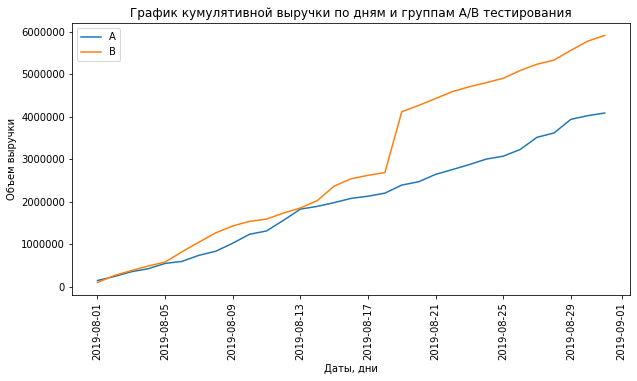

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue_A['date'],
         cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'],
         cumulative_revenue_B['revenue'], label='B')
plt.title('График кумулятивной выручки по дням и группам A/B тестирования')
plt.xlabel('Даты, дни')
plt.ylabel('Объем выручки')
plt.xticks(rotation=90)
plt.legend()

График по кумулятивной выручке в группе A-тестирования почти равномерно растет, при этом группа B показывает всплеск по выручке в 18-20х числах августа, их стоит проанализировать далее. Скорее всего, это какие-то очень дорогие заказы.


#### Анализ  кумулятивного среднего чека по группам

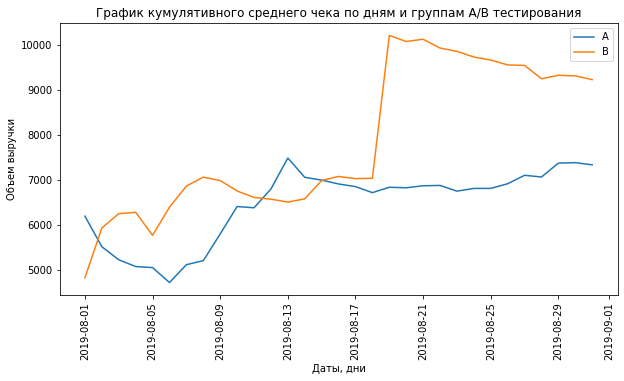

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] /
         cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] /
         cumulative_revenue_B['orders'], label='B')
plt.title('График кумулятивного среднего чека по дням и группам A/B тестирования')
plt.xlabel('Даты, дни')
plt.ylabel('Объем выручки')
plt.xticks(rotation=90)
plt.legend()

Средний чек в обеих группах растет неравномерно, со скачками вверх и вниз особенно четко виден всплеск в графике группы B, в те же дни, в которых мы наблюдали резкий скачок кумулятивной выручки группы B. Скорее всего, это были очень дорогие заказы, поэтому средний чек резко возрос, необходимо больше данных для того, чтобы он стабилизировался.

К концу периода тестирования, что интересно, график кумулятивной выручки группы A равномерно растет, а группы B равномерно снижается, но тем не менее, остается выше среднего чека группы A. 


Рассмотрим график относительного изменения кумулятивного среднего чека группы B к группе А для лучшего понимания.

In [21]:
# собираем кумулятивные данные в одном датафрейме

merged_cumulative_revenue = cumulative_revenue_A.merge(
    cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


Text(0, 0.5, 'КОэффициент относительного различия')

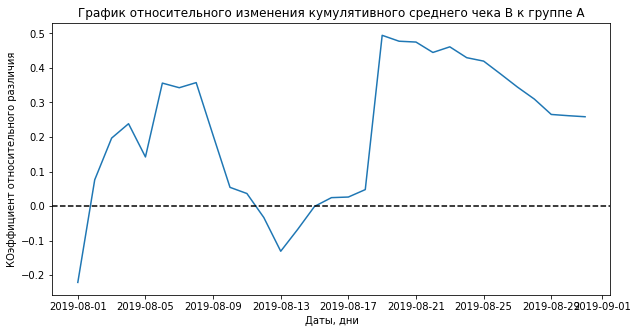

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(merged_cumulative_revenue['date'], (
    merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(
    merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека B к группе А')
plt.xlabel('Даты, дни')
plt.ylabel('КОэффициент относительного различия')

В некоторых точках график различия кумулятивного среднего чека резко скачет, это влияние дорогих заказов и выбросов.

#### Анализ кумулятивной конверсии по группам

In [23]:
# считаем кумулятивную конверсию, поделив количество заказов к количеству посетителей интернет-магазина
cumulative_data['conversion'] = cumulative_data['orders'] / \
    cumulative_data['visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.03
1,2019-08-01,B,21,20,101217,713,0.03
2,2019-08-02,A,44,38,242401,1338,0.03
3,2019-08-02,B,45,43,266748,1294,0.03
4,2019-08-03,A,68,62,354874,1845,0.04


,orders,buyers,revenue,visitors,conversion
count,31.00,31.00,31.00,31.00,31.00
mean,297.71,270.35,2024355.58,9860.42,0.03
std,160.36,145.41,1209240.73,5389.78,0.00
min,24.00,20.00,148579.00,719.00,0.03
25%,169.00,152.50,931350.00,5547.50,0.03
50%,301.00,277.00,2078908.00,10047.00,0.03
75%,433.50,392.50,2938218.50,14124.50,0.03
max,557.00,503.00,4084803.00,18736.00,0.04


,orders,buyers,revenue,visitors,conversion
count,31.00,31.00,31.00,31.00,31.00
mean,337.61,313.45,2904625.68,9906.19,0.03
std,184.92,168.33,1932481.84,5455.34,0.00
min,21.00,20.00,101217.00,713.00,0.03
25%,192.50,182.00,1350995.00,5603.00,0.03
50%,359.00,336.00,2539635.00,10013.00,0.03
75%,485.00,447.00,4750969.00,14259.00,0.03
max,640.00,586.00,5907760.00,18916.00,0.04


Text(0, 0.5, 'Показатель кумулятивной конверсии')

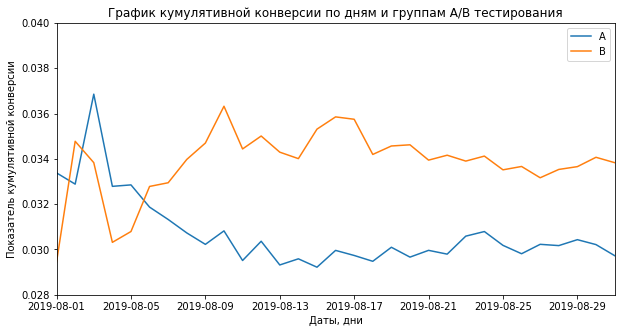

In [24]:
# отделяем данные по группам
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
display(cumulative_data_A.describe())
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']
display(cumulative_data_B.describe())

# построение графика кумулятивной конверсии по группам
plt.figure(figsize=(10, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()
plt.axis(['2019-08-01', '2019-08-31', 0.028, 0.04])
plt.title('График кумулятивной конверсии по дням и группам A/B тестирования')
plt.xlabel('Даты, дни')
plt.ylabel('Показатель кумулятивной конверсии')

В начале тестируемого периода конверсия группы B была ниже конверсии группы B, но в течение следующих дней графики были примерно на одной плоскости, с небольшими скачками. При этом кумулятивная конверсия группы B четко зафиксировалась на порядок выше конверсии группы А. 


Ниже рассмотрим график относительного изменения кумулятивной конверсии группы B к группе A.оложения.

In [25]:
# Создадим датафрейм с объединенными таблицами с конверсией по группам:
merged_cumulative_conversions = cumulative_data_A[['date', 'conversion']].merge(
    cumulative_data_B[['date', 'conversion']], left_on='date', right_on='date', suffixes=['A', 'B'])
merged_cumulative_conversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.03,0.03
1,2019-08-02,0.03,0.03
2,2019-08-03,0.04,0.03
3,2019-08-04,0.03,0.03
4,2019-08-05,0.03,0.03


['2019-08-01', '2019-08-31', -0.11, 0.21]

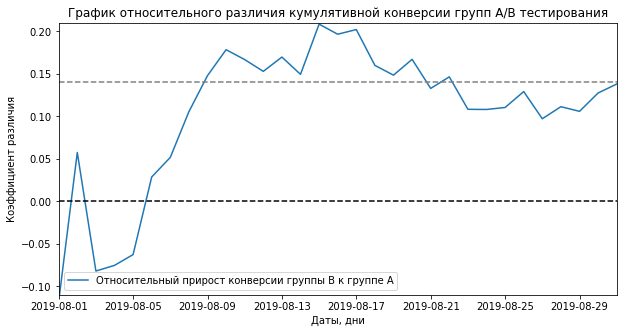

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(
    merged_cumulative_conversions['date'],
    merged_cumulative_conversions['conversionB'] /
    merged_cumulative_conversions['conversionA']-1,
    label='Относительный прирост конверсии группы B к группе А')
plt.legend()
plt.title(
    'График относительного различия кумулятивной конверсии групп A/B тестирования')
plt.xlabel('Даты, дни')
plt.ylabel('Коэффициент различия')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-08-31', -0.11, 0.21])

В первые дни тестирования конверсия группы B с попеременным успехом то выигрывала у группы А, то прригрывала. С 7-8 августа группа B вырвалась в перед по показателю кумулятивной конверсии и зафиксировалась на уровне 0.10-0.15 к группе А. 

По данному графику можно предположить, что такая тенденция сохраниться, но делать выводы рано.


#### Анализ выбросов и всплесков

##### 1. Сколько раз покупают?

Для начало нужно проанализировать данные о покупках на предмет обнаружения аномального количество заказов. Для этого необходимо создать агрегированную таблицу с количеством заказов по каждому пользователю

In [27]:
orders_by_users = orders.drop(
    ['group', 'revenue', 'date'], axis=1).groupby(
    'visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['visitorId', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Часть пользователей совершает больше 5 покупок на сайте в течение месяца, но неясно, насколько типичное это поведения пользователей. Необходимо проанализировать распределение этого признака.

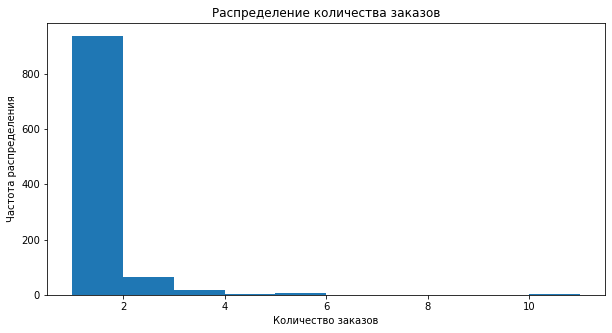

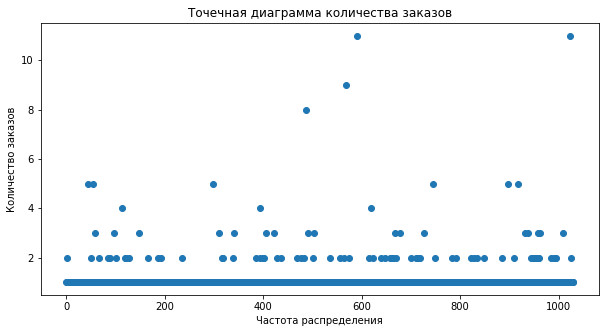

In [28]:
# построим гистограмму распределения количества заказов
plt.figure(figsize=(10, 5))
plt.hist(orders_by_users['orders'])
plt.title('Распределение количества заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Частота распределения')
plt.show()

# построим точечную диаграмму количества заказов по пользователям
plt.figure(figsize=(10, 5))
x_values = pd.Series(range(0, len(orders_by_users['orders'])))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Точечная диаграмма количества заказов')
plt.ylabel('Количество заказов')
plt.xlabel('Частота распределения')
plt.show()

Большая часть покупателей заказывает 1 раз (за месяц, как мы можем утверждать). При этом существует очень маленькая вероятность появления более двух заказов у пользователя. 

Подсчитаем 95 и 99ый перцентили количества заказов на пользователя для определения границы аномальных пользователей.

In [29]:
print(
    f'Не более 1 процента пользователей оформляли больше, чем {int(np.percentile(orders_by_users.orders, [99]))} заказа.')
print(
    f'5 процентов пользователей совершали более {int(np.percentile(orders_by_users.orders, [95]))} заказов.')

Не более 1 процента пользователей оформляли больше, чем 4 заказа.
5 процентов пользователей совершали более 2 заказов.


Примем 2 заказа как нижнюю границу числа заказов.


##### 2. Какова стоимость 1 заказа?

При попадании очень дорогих заказов в результате тестирования, мы можем исказить результаты A/B тестирования, так как такие заказы редки, но могут повлиять на увеличение конверсии, среднего чека в группе появления.

Построим для начала гистограмму распределения стоимости заказов и точечный график.

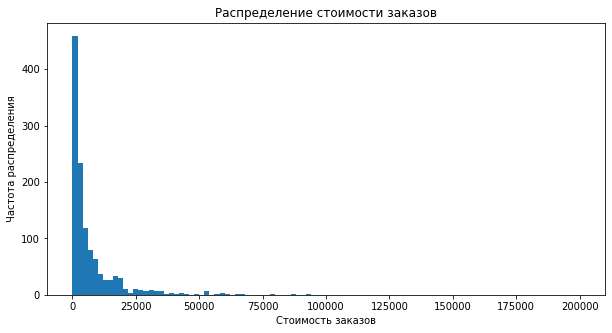

In [30]:
# построим гистограмму распределения стоимости заказов
plt.figure(figsize=(10, 5))
plt.hist(orders['revenue'], bins=100, range=(0, 200000))
plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Частота распределения')
plt.show()

Можно заметить, что практически все пользователи совершали заказы стоимости менее 200 000 у.е., причем основная часть заказов - примерно до 25 000 у.е.

Для ясности картины построим точечный график со всеми заказами и график с заказами стоимостью менее 200 000 у.е.

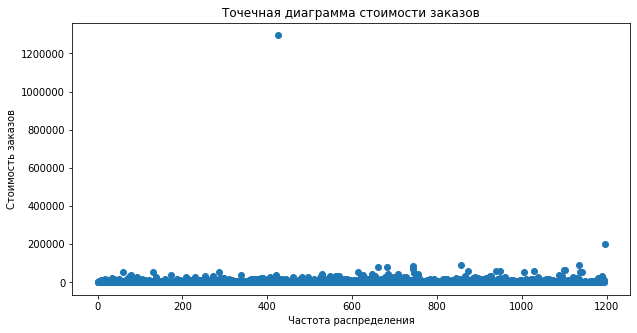

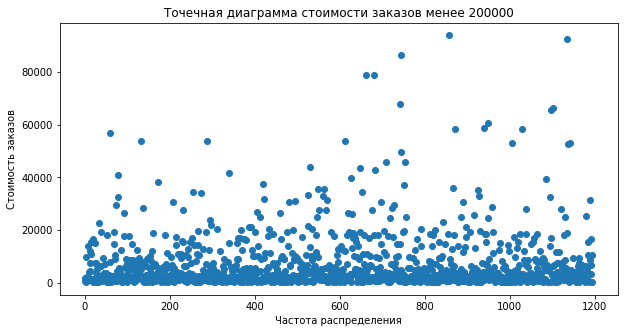

In [31]:
# построим точечную диаграмму стоимости заказов по пользователям
plt.figure(figsize=(10, 5))
x_values = pd.Series(
    range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма стоимости заказов')
plt.ylabel('Стоимость заказов')
plt.xlabel('Частота распределения')
plt.show()

plt.figure(figsize=(10, 5))
x_values = pd.Series(
    range(0, len(orders[orders['revenue'] < 200000]['revenue'])))
plt.scatter(x_values, orders[orders['revenue'] < 200000]['revenue'])
plt.title('Точечная диаграмма стоимости заказов менее 200000')
plt.ylabel('Стоимость заказов')
plt.xlabel('Частота распределения')
plt.show()

Если посмотреть на первый точечный график, где включены все заказы, можно заметить, что существуют очень крупные заказы, как раз те, что могут исказить общую картину при A/B тестировании. Есть заказ стоимостью даже выше 1 200 000 у.е., что совсем нетипично для данного интернет-магазина, есть один заказ примерно на 200 000, при этом вся основная часть заказов располагается до 20 000 у.е. Это и есть те выбросы, которые повлияли на графики кумулятивной конверсии и среднего чека по группам.

После 40 000 у.е. стоимость заказа на 1 пользователя встречается очень редко, рассмотрим перцентили стоимости заказов для определения границ аномальной стоимости заказов.

In [32]:
print(
    f'Около 1 процента пользователей совершали заказ более, чем на {int(np.percentile(orders.revenue, [99]))} у.е.')
print(
    f'5 процентов пользователей заказывали более, чем на {int(np.percentile(orders.revenue, [95]))} у.е.')

Около 1 процента пользователей совершали заказ более, чем на 58233 у.е.
5 процентов пользователей заказывали более, чем на 28000 у.е.


Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.


#### Анализ A/B тестирования 

##### 1. Подсчет статистической значимости различий в конверсии между группами по "сырым" данным.



Для начала сформируем данные по каждой группе тестирования по количеству пользователей в день и кумулятивным количеством к определенному дню.

In [33]:
display(visitors.head())

# создание таблицы с количеством пользователей по дням в группе А
daily_visitorsA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
daily_visitorsA.columns = ['date', 'visitors_per_dayA']
display(daily_visitorsA.head())

# создание таблицы с кумулятивным количеством пользователей в группе А
cumulative_visitorsA = daily_visitorsA.apply(
    lambda x: daily_visitorsA[daily_visitorsA['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dayA': 'sum'}), axis=1)
cumulative_visitorsA.columns = ['date', 'visitors_cimilativeA']
display(cumulative_visitorsA.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,visitors_per_dayA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


,date,visitors_cimilativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [34]:
# создание таблицы с количеством пользователей по дням в группе В
daily_visitorsB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
daily_visitorsB.columns = ['date', 'visitors_per_dayB']
display(daily_visitorsB.head())

# создание таблицы с кумулятивным количеством пользователей в группе В
cumulative_visitorsB = daily_visitorsB.apply(
    lambda x: daily_visitorsB[daily_visitorsB['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dayB': 'sum'}), axis=1)
cumulative_visitorsB.columns = ['date', 'visitors_cimilativeB']
display(cumulative_visitorsB.head())

,date,visitors_per_dayB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


,date,visitors_cimilativeB
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Также сформируем таблицы с данными по заказам по группам по дням и кумулятивным данным к определенному дню.

In [35]:
display(orders.head())

# создание таблицы с количеством заказов и стоимости заказов по дням в группе А
daily_ordersA = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})
daily_ordersA.columns = ['date', 'orders_per_dayA', 'revenue_per_dayA']
display(daily_ordersA.head())

# создание таблицы с кумулятивным количеством заказов и стоимости заказов в группе А
cumulative_ordersA = daily_ordersA.apply(
    lambda x: daily_ordersA[daily_ordersA['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dayA': 'sum', 'revenue_per_dayA': 'sum'}), axis=1).sort_values(by=['date'])
display(cumulative_ordersA.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,orders_per_dayA,revenue_per_dayA
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


,date,orders_per_dayA,revenue_per_dayA
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [36]:
# создание таблицы с количеством заказов и стоимости заказов по дням в группе В
daily_ordersB = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId': 'nunique', 'revenue': 'sum'})
daily_ordersB.columns = ['date', 'orders_per_dayB', 'revenue_per_dayB']
display(daily_ordersB.head())

# создание таблицы с кумулятивным количеством заказов и стоимости заказов в группе В
cumulative_ordersB = daily_ordersB.apply(
    lambda x: daily_ordersB[daily_ordersB['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dayB': 'sum', 'revenue_per_dayB': 'sum'}), axis=1).sort_values(by=['date'])
display(cumulative_ordersB.head())

,date,orders_per_dayB,revenue_per_dayB
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


,date,orders_per_dayB,revenue_per_dayB
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


In [37]:
# объединим все данные по группам в одну таблицу
data = daily_ordersA.merge(
    daily_ordersB, left_on='date', right_on='date', how='left').merge(
    cumulative_ordersA, left_on='date', right_on='date', how='left').merge(
    cumulative_ordersB, left_on='date', right_on='date', how='left').merge(
    daily_visitorsA, left_on='date', right_on='date', how='left').merge(
    daily_visitorsB, left_on='date', right_on='date', how='left').merge(
    cumulative_visitorsA, left_on='date', right_on='date', how='left').merge(
    cumulative_visitorsB, left_on='date', right_on='date', how='left')
display(data.head())

,date,orders_per_dayA_x,revenue_per_dayA_x,orders_per_dayB_x,revenue_per_dayB_x,orders_per_dayA_y,revenue_per_dayA_y,orders_per_dayB_y,revenue_per_dayB_y,visitors_per_dayA,visitors_per_dayB,visitors_cimilativeA,visitors_cimilativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `orders_by_usersA` и `orders_by_usersA`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [38]:
orders_by_usersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg(
    {'transactionId': 'nunique'})
orders_by_usersA.columns = ['visitorId', 'orders']
display(orders_by_usersA.head())

orders_by_usersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg(
    {'transactionId': 'nunique'})
orders_by_usersB.columns = ['visitorId', 'orders']
display(orders_by_usersB.head())

,visitorId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Для подготовки данных к проверке на статистическую значимость в различиях в конверсиях, необходимо создать переменным `sampleA` и `sampleB`, в которых будут храниться данные по всем пользователям и количеству заказов по каждому (в том числе посетителей, не совершивших ни одного заказа).

In [39]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0, index=np.arange(
    data['visitors_per_dayA'].sum()-len(orders_by_usersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0, index=np.arange(
    data['visitors_per_dayB'].sum()-len(orders_by_usersB['orders'])), name='orders')], axis=0)

Сформулируем следующие гипотезы - 

0. Конверсии в группах A и B равны
1. Конверсии в группах A и B отличаются

Примем за alpha значение, равное 0.05

In [40]:
alpha = 0.05

Воспользуемся непараметрическим критерием Манна Уитни, так как количество заказов и стоимость заказов распределены ненормально, также существуют выбросы.


In [41]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

if (stats.mannwhitneyu(sampleA, sampleB)[1] < alpha):
    print('Отвергаем нулевую гипотезу: разница в конверсии статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии конверсий сделать нельзя')

print("Относительный выигрыш группы B к группе А равен: {0:.2%}".format(
    sampleB.mean()/sampleA.mean()-1))

0.008
Отвергаем нулевую гипотезу: разница в конверсии статистически значима
Относительный выигрыш группы B к группе А равен: 13.81%


Можно сделать вывод, что даже по "сырым" данным существуют различия в конверсии между группами A и В. При этом относительный выигрыш группы В равен 13,8 %.

##### 2. Подсчет статистической значимости различий в среднем чеке между группами по "сырым" данным.



In [42]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

if (stats.mannwhitneyu(
        orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1] < alpha):
    print('Отвергаем нулевую гипотезу: разница в среднем чеке статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии среднего чека сделать нельзя')

print("Относительный выигрыш группы В к группе А составляет {0:.2%}".format(
    orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

0.365
Не получилось отвергнуть нулевую гипотезу, вывод о различии среднего чека сделать нельзя
Относительный выигрыш группы В к группе А составляет 25.87%


Нет причин полагать, что существуют различия в среднем чеке групп A/B тестирования, при этом средний чек группы B выше среднего чека группы A на 25%.

##### 3. Подсчет статистической значимости различий в конверсии между группами по "очищенным" данным.

Для начала сформируем список пользователей с необычным поведением - более, чем 2 заказа и со стоимостью более 30 000 у.е.

In [43]:
users_with_many_orders = pd.concat(
    [orders_by_usersA[orders_by_usersA['orders'] > 2]['visitorId'],
     orders_by_usersB[orders_by_usersB['orders'] > 2]['visitorId']], axis=0)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitorId']

abnormal_users = pd.concat(
    [users_with_many_orders, users_with_expensive_orders], axis=0).drop_duplicates().sort_values()

Создадим переменные `sampleA_filtered` и `sampleB_filtered` с данными о количестве заказов на одного пользователя (также включм пользователей, которые не совершили заказа вообще).

In [44]:
sampleA_filtered = pd.concat(
    [orders_by_usersA[np.logical_not(orders_by_usersA['visitorId'].isin(abnormal_users))]['orders'], pd.Series(
        0, index=np.arange(data['visitors_per_dayA'].sum()-len(orders_by_usersA['orders'])), name='orders')], axis=0)
sampleB_filtered = pd.concat(
    [orders_by_usersB[np.logical_not(orders_by_usersB['visitorId'].isin(abnormal_users))]['orders'], pd.Series(
        0, index=np.arange(data['visitors_per_dayB'].sum()-len(orders_by_usersB['orders'])), name='orders')], axis=0)

In [45]:
print("{0:.3f}".format(stats.mannwhitneyu(
    sampleA_filtered, sampleB_filtered)[1]))

if (stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1] < alpha):
    print('Отвергаем нулевую гипотезу: разница в конверсии статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии конверсий сделать нельзя')

print("Относительный выигрыш группы B к группе А равен: {0:.2%}".format(
    sampleB_filtered.mean()/sampleA_filtered.mean()-1))

0.007
Отвергаем нулевую гипотезу: разница в конверсии статистически значима
Относительный выигрыш группы B к группе А равен: 17.27%


Итак, мы подтверждаем, что по очищенным данным имеются различия в конверсии группы В к группе А - примерно на 17% конверсия выше.

##### 4. Подсчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным.

In [46]:
stat, pvalue = stats.mannwhitneyu(orders[np.logical_and(
    orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])

print(pvalue)

if (pvalue < alpha):
    print('Отвергаем нулевую гипотезу: разница в среднем чеке статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии среднего чека сделать нельзя')

print("Относительный выигрыш группы В к группе А составляет {0:.2%}".format(
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() - 1))

0.3692408756572825
Не получилось отвергнуть нулевую гипотезу, вывод о различии среднего чека сделать нельзя
Относительный выигрыш группы В к группе А составляет -1.96%


После очищения данных, средний чек группы В снизился к среднему чеку группы А, он стал меньше на 2 процента, до -был выше на 25%. При этом нет причин полагать, что есть различия в среднем чеке между группами.



## <a id="step4">Выводы </a>

Итак, общие выводы после очищения данных от аномалий, не изменились. И мы можем смело утверждать, что существует статистическая значимость различий в конверсии между группами A и B. Вероятность ошибки первого рода снизилась, при этом разница между сегментами увеличилась - с 13 до 17%.

При этом нет статистической значимости различий в среднем чеке в группах A и B ни с учетом аномальных данных, ни без учета. При этом разница между группами уменьшилась - с 25 процентов выигрыша до 2 процентов проигрыша группы B к группе А. 

График различия между конверсией групп показывает нам, что результаты группы B улучшались через пару дней после начала тестирования и зафиксировались выше результатов группы A на 10-15%, незначительно повышаясь или снижаясь день ото дня.

График относительного изменения среднего чека группы B к группе А показывает, что средний чек группы B с переменным успехом был выше или ниже результата группы A. Сделать определенные выводы сложно.



**Результат проведенного A/B тестирования: необходимо остановить тест, зафиксировав победу группы B, исходя из статистической значимости различий конверсии. Тестируемая функциональность может поднять конверсию на 13-17%, но не увеличив средний чек.**

